In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the data
df = pd.read_csv('Mall_Customers.csv')


In [3]:
print(df.head())
print(df.info())
print(df.describe())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

In [4]:
# Convert categorical data to numerical data
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


C:\Users\JENIFER\.conda\envs\tf-new\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\JENIFER\.conda\envs\tf-new\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\JENIFER\.conda\envs\tf-new\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\JENIFER\.conda\envs\tf-new\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMe

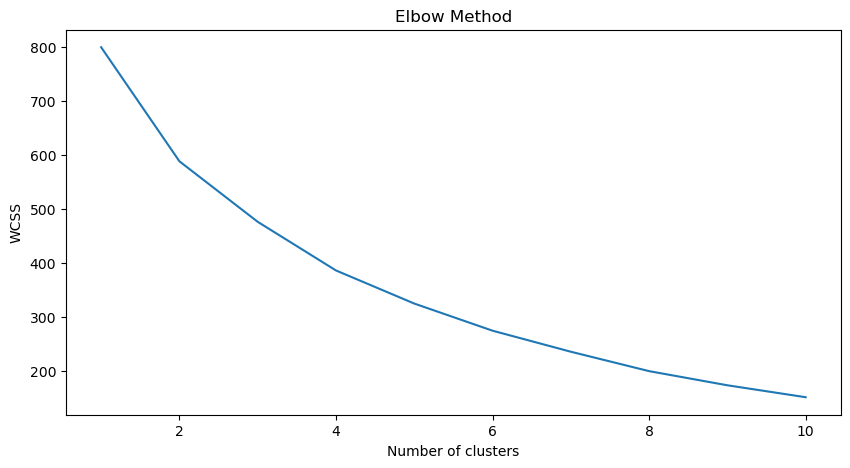

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [6]:
# Assuming the optimal number of clusters is 5
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)


C:\Users\JENIFER\.conda\envs\tf-new\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


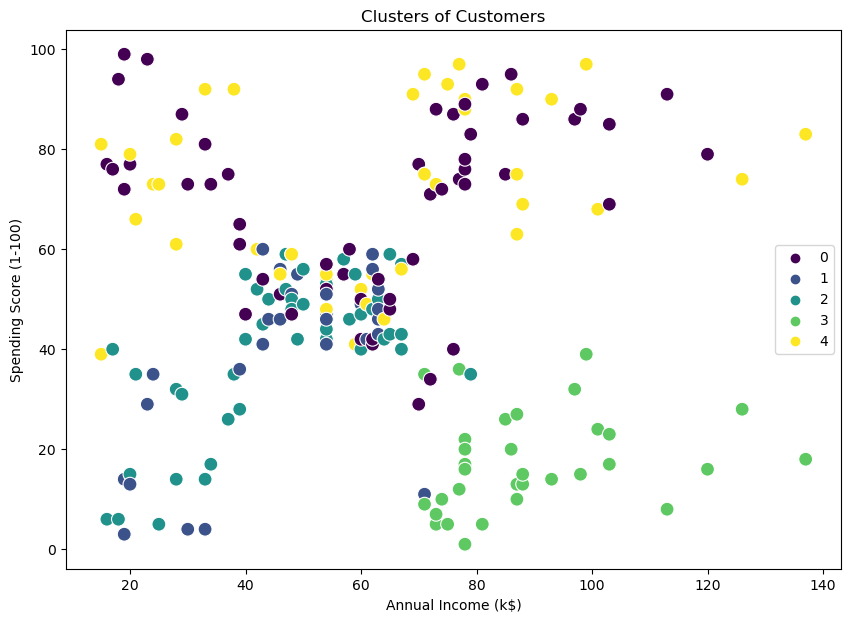

In [7]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [8]:
for cluster in range(optimal_clusters):
    print(f"Cluster {cluster}:")
    print(df[df['Cluster'] == cluster].describe())
    print("\n")


Cluster 0:
       CustomerID  Gender        Age  Annual Income (k$)  \
count   55.000000    55.0  55.000000           55.000000   
mean   102.854545     1.0  28.345455           60.800000   
std     59.583250     0.0   5.571815           26.155093   
min      4.000000     1.0  18.000000           16.000000   
25%     47.000000     1.0  23.000000           39.500000   
50%    112.000000     1.0  29.000000           63.000000   
75%    155.000000     1.0  32.000000           78.000000   
max    196.000000     1.0  40.000000          120.000000   

       Spending Score (1-100)  Cluster  
count               55.000000     55.0  
mean                68.654545      0.0  
std                 18.323450      0.0  
min                 29.000000      0.0  
25%                 53.000000      0.0  
50%                 73.000000      0.0  
75%                 84.000000      0.0  
max                 99.000000      0.0  


Cluster 1:
       CustomerID  Gender        Age  Annual Income (k$)  \
count 